<a href="https://colab.research.google.com/github/ujwaldeepk/Data_Science_and_Machine_Learning/blob/main/ML_2_Lab_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Issue: Missing Values.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/df_missing_100.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Age         85 non-null     float64
 2   Salary      85 non-null     float64
 3   Gender      90 non-null     object 
 4   Department  90 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,15
Salary,15
Gender,10
Department,10


In [ ]:
df.rename(columns={df.columns[0]:'serial number'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   serial number  100 non-null    int64  
 1   Age            85 non-null     float64
 2   Salary         85 non-null     float64
 3   Gender         90 non-null     object 
 4   Department     90 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


## Method-1

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill continuous with mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Fill continuous with mean

<ipython-input-7-fa31275e9194>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill continuous with mean
<ipython-input-7-fa31275e9194>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  # Fill categorical with mode
df['Department'].fillna(df['Department'].mode()[0], inplace=True)  # Fill categorical with mode

<ipython-input-8-6b5f89cda9ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  # Fill categorical with mode
<ipython-input-8-6b5f89cda9ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
df.isnull().sum()

,0
serial number,0
Age,0
Salary,0
Gender,0
Department,0


## Method-2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
df_1=pd.read_csv('https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/df_missing_100.csv')

In [ ]:
df_1.isnull().sum()

,0
Unnamed: 0,0
Age,15
Salary,15
Gender,10
Department,10


In [ ]:
# Clean the dataset by imputing missing values
# Impute continuous data with the mean
continuous_imputer = SimpleImputer(strategy='mean')
df_1[['Age', 'Salary']] = continuous_imputer.fit_transform(df_1[['Age', 'Salary']])

# Impute categorical data with the mode (most frequent)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_1[['Gender', 'Department']] = categorical_imputer.fit_transform(df_1[['Gender', 'Department']])

In [ ]:
df_1.isnull().sum()

,0
Unnamed: 0,0
Age,0
Salary,0
Gender,0
Department,0


# Issue: Duplicate Rows

## Type-1

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/duplicate_dataset.csv")

# Find duplicate rows (excluding the first occurrence)
duplicates = df[df.duplicated()]
print(duplicates)


    ID        Date  Temperature (°C)  Weight (kg)
8    8  2023-08-10              32.0          3.7
12   4  2023-04-20              25.5          2.8
13   4  2023-04-20              25.5          2.8
15   8  2023-08-10              32.0          3.7
16   4  2023-04-20              25.5          2.8
17   8  2023-08-10              32.0          3.7
18   8  2023-08-10              32.0          3.7
19   8  2023-08-10              32.0          3.7
20   8  2023-08-10              32.0          3.7
22   4  2023-04-20              25.5          2.8
23   8  2023-08-10              32.0          3.7


In [ ]:
df.value_counts().reset_index(name="Count")


,ID,Date,Temperature (°C),Weight (kg),Count
0,8,2023-08-10,32.0,3.7,8
1,4,2023-04-20,25.5,2.8,5
2,1,2023-01-10,30.0,2.5,1
3,2,2023-02-10,28.5,3.1,1
4,3,2023-03-15,27.0,4.0,1
5,5,2023-05-25,26.0,3.5,1
6,6,2023-06-30,29.2,4.2,1
7,7,2023-07-05,31.5,2.9,1
8,9,2023-09-15,30.3,4.5,1
9,10,2023-10-20,28.7,3.2,1


In [ ]:
# Remove all duplicate rows (keeping only unique ones)
df_unique = df.drop_duplicates(keep=False)

In [ ]:
df_unique.value_counts().reset_index(name="Count")

,ID,Date,Temperature (°C),Weight (kg),Count
0,1,2023-01-10,30.0,2.5,1
1,2,2023-02-10,28.5,3.1,1
2,3,2023-03-15,27.0,4.0,1
3,5,2023-05-25,26.0,3.5,1
4,6,2023-06-30,29.2,4.2,1
5,7,2023-07-05,31.5,2.9,1
6,9,2023-09-15,30.3,4.5,1
7,10,2023-10-20,28.7,3.2,1
8,11,2023-11-25,27.5,2.6,1
9,12,2023-12-30,26.8,3.9,1


## Type-2

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/duplicate_dataset-1.csv")

# Find duplicate rows (excluding the first occurrence)
# duplicates = df[df.duplicated()]
print(df[df.duplicated()])


Empty DataFrame
Columns: [ID, Date, Temperature (°C), Weight (kg)]
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25 non-null     int64  
 1   Date              25 non-null     object 
 2   Temperature (°C)  25 non-null     float64
 3   Weight (kg)       25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 932.0+ bytes


In [ ]:
print(df.head(25))

    ID        Date  Temperature (°C)  Weight (kg)
0    1  15,09,2023              30.3          4.5
1    2  20,04,2023              25.5          2.8
2    3  10,01,2023              30.0          2.5
3    4  10,08,2023              32.0          3.7
4    5  30,12,2023              26.8          3.9
5    6  20,10,2023              28.7          3.2
6    7  10,02,2024              30.6          2.7
7    8  10,02,2023              28.5          3.1
8    9  10,08,2023              32.0          3.7
9   10  30,06,2023              29.2          4.2
10  11  15,03,2023              27.0          4.0
11  12  05,01,2024              29.9          4.1
12  13  20,04,2023              25.5          2.8
13  14  20,04,2023              25.5          2.8
14  15  25,05,2023              26.0          3.5
15  16  10,08,2023              32.0          3.7
16  17  20,04,2023              25.5          2.8
17  18  10,08,2023              32.0          3.7
18  19  10,08,2023              32.0          3.7


In [ ]:
df_1=df.drop(['ID'],axis=1)
df_1.value_counts().reset_index(name="Count")

,Date,Temperature (°C),Weight (kg),Count
0,"10,08,2023",32.0,3.7,8
1,"20,04,2023",25.5,2.8,5
2,"05,01,2024",29.9,4.1,1
3,"05,07,2023",31.5,2.9,1
4,"10,01,2023",30.0,2.5,1
5,"10,02,2023",28.5,3.1,1
6,"10,02,2024",30.6,2.7,1
7,"15,03,2023",27.0,4.0,1
8,"15,09,2023",30.3,4.5,1
9,"20,10,2023",28.7,3.2,1


In [ ]:
# Remove all duplicate rows (keeping only unique ones)
df_unique_1 = df_1.drop_duplicates(keep=False)

In [ ]:
df_unique_1.value_counts().reset_index(name="Count")

,Date,Temperature (°C),Weight (kg),Count
0,"05,01,2024",29.9,4.1,1
1,"05,07,2023",31.5,2.9,1
2,"10,01,2023",30.0,2.5,1
3,"10,02,2023",28.5,3.1,1
4,"10,02,2024",30.6,2.7,1
5,"15,03,2023",27.0,4.0,1
6,"15,09,2023",30.3,4.5,1
7,"20,10,2023",28.7,3.2,1
8,"25,05,2023",26.0,3.5,1
9,"25,11,2023",27.5,2.6,1


# Issue: Outliers

## Type-1

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/mixed_outliers_dataset.csv")

In [ ]:
df.head(30)

,ID,Age,Salary ($),Department,Satisfaction Score
0,1,45,50870.470682,Marketing,8
1,2,24,47009.926495,Engineering,9
2,3,26,50917.607765,Engineering,4
3,4,120,30124.310854,Marketing,1
4,5,29,47803.281122,Finance,1
5,6,51,53571.125715,Engineering,4
6,7,50,64778.940447,Marketing,7
7,8,40,44817.297817,Engineering,2
8,9,41,200000.000000,Marketing,3
9,10,54,44982.429564,Engineering,1


In [ ]:
df.describe()

,ID,Age,Salary ($),Satisfaction Score
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,40.166667,51898.776193,4.200000
std,8.803408,20.554525,30172.275958,3.575781
min,1.000000,2.000000,500.000000,-3.000000
25%,8.250000,26.750000,44858.580754,1.000000
50%,15.500000,40.500000,47728.704894,4.000000
75%,22.750000,51.750000,53205.934015,7.000000
max,30.000000,120.000000,200000.000000,15.000000


Identify outliers for numerical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  30 non-null     int64  
 1   Age                 30 non-null     int64  
 2   Salary ($)          30 non-null     float64
 3   Department          30 non-null     object 
 4   Satisfaction Score  30 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


Age

In [ ]:
    Q1 = df['Age'].quantile(0.25)
    Q3 = df['Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound), 'Age'] = df['Age'].median()

<ipython-input-30-5141710dba9a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound), 'Age'] = df['Age'].median()


Salary

In [ ]:
    Q1 = df['Salary ($)'].quantile(0.25)
    Q3 = df['Salary ($)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.loc[(df['Salary ($)'] < lower_bound) | (df['Salary ($)'] > upper_bound), 'Salary ($)'] = df['Salary ($)'].median()

Satisfaction Level

In [ ]:
    Q1 = df['Satisfaction Score'].quantile(0.25)
    Q3 = df['Satisfaction Score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df['Satisfaction Score'] < lower_bound) | (df['Satisfaction Score'] > upper_bound), 'Satisfaction Score'] = df['Satisfaction Score'].median()

In [ ]:
df.describe()

,ID,Age,Salary ($),Satisfaction Score
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,37.516667,48984.169654,4.200000
std,8.803408,13.980580,6291.777270,3.575781
min,1.000000,2.000000,35364.850519,-3.000000
25%,8.250000,26.750000,45864.889696,1.000000
50%,15.500000,40.250000,47728.704894,4.000000
75%,22.750000,50.750000,52873.540258,7.000000
max,30.000000,57.000000,64778.940447,15.000000


## Type-2

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/mixed_outliers_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  30 non-null     int64  
 1   Age                 30 non-null     int64  
 2   Salary ($)          30 non-null     float64
 3   Department          30 non-null     object 
 4   Satisfaction Score  30 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


In [ ]:
df[['Age']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Age,45,24,26,120,29,51,50,40,41,54,...,18,22,2,31,56,44,26,32,32,43


In [ ]:
df[['Age']].quantile([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).transpose()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Age,2.0,19.8,25.6,30.4,32.0,40.5,44.0,50.3,52.0,54.2,120.0


In [ ]:
df[['Age']].quantile([0,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]).transpose()

,0.00,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Age,2.0,54.78,55.36,55.94,56.26,56.55,56.84,65.19,83.46,101.73,120.0


3% outliers...>66 are outliers.

In [ ]:
df.loc[(df["Age"] > 10), "Age"] = df["Age"].median()

<ipython-input-40-5b1e16a2e5ba>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Age"] > 10), "Age"] = df["Age"].median()


In [ ]:
df[['Salary ($)']].quantile([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).transpose()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Salary ($),500.0,35798.148373,44357.812182,45550.21161,46663.169054,47728.704894,50889.325516,52715.747736,53665.002286,59207.26405,200000.0


In [ ]:
df[['Salary ($)']].quantile([0,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]).transpose()

,0.00,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Salary ($),500.0,59361.668381,59516.072712,59670.477043,61010.497446,62487.319703,63964.141961,82357.678189,121571.78546,160785.89273,200000.0


4% outliers....>64000 are outliers

In [ ]:
df.loc[(df["Salary ($)"] > 10), "Salary ($)"] = df["Salary ($)"].median()

In [ ]:
df[['Satisfaction Score']].quantile([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).transpose()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Satisfaction Score,-3.0,1.0,1.0,1.7,2.6,4.0,5.0,6.3,7.0,8.0,15.0


In [ ]:
df[['Satisfaction Score']].quantile([0,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]).transpose()

,0.00,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Satisfaction Score,-3.0,8.0,8.0,8.0,8.26,8.55,8.84,9.78,11.52,13.26,15.0


3% outliers......>10 are outliers and <0 are outliers

In [ ]:
df.loc[(df["Satisfaction Score"] > 10) | (df["Satisfaction Score"] < 0), "Satisfaction Score"] = df["Satisfaction Score"].median()

In [ ]:
df.describe()

,ID,Age,Salary ($),Satisfaction Score
count,30.000000,30.000000,3.000000e+01,30.000000
mean,15.500000,39.216667,4.772870e+04,4.066667
std,8.803408,7.029106,7.400342e-12,2.638355
min,1.000000,2.000000,4.772870e+04,1.000000
25%,8.250000,40.500000,4.772870e+04,1.250000
50%,15.500000,40.500000,4.772870e+04,4.000000
75%,22.750000,40.500000,4.772870e+04,6.750000
max,30.000000,40.500000,4.772870e+04,9.000000


# Cross tab

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Create the initial data with 'Unknown' values
data = {
    'Employee ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Department': ['IT', 'IT', 'Unknown', 'HR', 'HR', 'Unknown', 'Finance', 'Finance', 'Sales', 'Unknown'],
    'Salary': [85000, 95000, 90000, 60000, 55000, 50000, 88000, 110000, 75000, 45000],
    'Experience': [3, 5, 4, 2, 1, 3, 6, 7, 4, 2],
    'Promotion': ['Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No']
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

In [ ]:
df['Department'].value_counts()

,count
Department,
Unknown,3
IT,2
HR,2
Finance,2
Sales,1


In [ ]:
# Step 2: Cross-tabulate the Department and Promotion, including 'Unknown'
cross_tab = pd.crosstab(df['Department'], df['Promotion'], normalize='index') * 100
cross_tab

Promotion,No,Yes
Department,,
Finance,0.000000,100.000000
HR,100.000000,0.000000
IT,50.000000,50.000000
Sales,100.000000,0.000000
Unknown,66.666667,33.333333


In [ ]:
df['Department'] = df['Department'].replace('Unknown', 'IT') # Imputation

In [ ]:
df['Department'].value_counts()

,count
Department,
IT,5
HR,2
Finance,2
Sales,1


In [ ]:
pd.crosstab(df['Department'], df['Promotion'], normalize='index') * 100

Promotion,No,Yes
Department,,
Finance,0.0,100.0
HR,100.0,0.0
IT,60.0,40.0
Sales,100.0,0.0


# Case Study: Give me some credit

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/cs-training.csv')

## basic data exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
data.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [ ]:
data.describe()

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sr_No,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [ ]:
data.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Sr_No,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,135000.100000,142500.05,148500.010000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,0.981278,1.00,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,72.000000,78.00,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,1.000000,2.00,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,1267.000000,2449.00,4979.040000,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,11666.000000,14587.60,25000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,15.000000,18.00,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,0.000000,1.00,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,2.000000,3.00,4.000000,54.0


In [ ]:
data.dtypes

,0
Sr_No,int64
SeriousDlqin2yrs,int64
RevolvingUtilizationOfUnsecuredLines,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64


In [ ]:
data.head(10)

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
data.sample(10)

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
82385,82386,0,0.416371,57,0,0.150385,10000.0,9,0,0,0,1.0
25909,25910,0,0.525468,74,0,0.434853,3729.0,5,0,1,0,1.0
120911,120912,0,0.077693,61,0,0.373257,8749.0,9,0,3,0,0.0
83215,83216,0,0.009236,67,1,0.001363,5135.0,4,0,0,0,0.0
72540,72541,0,0.003999,46,0,902.000000,NaN,4,0,1,0,NaN
21655,21656,0,0.626246,41,0,0.952005,3416.0,18,0,1,0,1.0
125403,125404,0,0.114392,39,0,0.107717,7333.0,5,0,1,0,0.0
111614,111615,0,0.005123,42,0,1608.000000,NaN,14,0,1,0,1.0
137679,137680,0,0.072795,60,0,0.252821,7000.0,3,0,1,0,0.0
66983,66984,0,0.620894,30,0,0.128035,7700.0,7,0,0,0,0.0


In [ ]:
#Check if column names are repeating
data.columns.value_counts()

,count
Sr_No,1
SeriousDlqin2yrs,1
RevolvingUtilizationOfUnsecuredLines,1
age,1
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate,1
NumberRealEstateLoansOrLines,1


discrete/categorical exploration

In [ ]:
data['SeriousDlqin2yrs'].nunique()

2

In [ ]:
for col in data.columns:
    print("------------------------------------")
    print(f"Unique values in {col}: {data[col].nunique()}")
    print("------------------------------------")

------------------------------------
Unique values in Sr_No: 150000
------------------------------------
------------------------------------
Unique values in SeriousDlqin2yrs: 2
------------------------------------
------------------------------------
Unique values in RevolvingUtilizationOfUnsecuredLines: 125728
------------------------------------
------------------------------------
Unique values in age: 86
------------------------------------
------------------------------------
Unique values in NumberOfTime30-59DaysPastDueNotWorse: 16
------------------------------------
------------------------------------
Unique values in DebtRatio: 114194
------------------------------------
------------------------------------
Unique values in MonthlyIncome: 13594
------------------------------------
------------------------------------
Unique values in NumberOfOpenCreditLinesAndLoans: 58
------------------------------------
------------------------------------
Unique values in NumberOfTimes90

In [ ]:
data['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [ ]:
for col in data.columns:
    print("------------------------------------")
    print(f"Unique values in {col}: ")
    print("                      ")
    counts=data[[col]].value_counts()
    print(counts)
    print("------------------------------------")

------------------------------------
Unique values in Sr_No: 
                      
Sr_No 
1         1
100013    1
99997     1
99998     1
99999     1
         ..
50001     1
50002     1
50003     1
50004     1
150000    1
Name: count, Length: 150000, dtype: int64
------------------------------------
------------------------------------
Unique values in SeriousDlqin2yrs: 
                      
SeriousDlqin2yrs
0                   139974
1                    10026
Name: count, dtype: int64
------------------------------------
------------------------------------
Unique values in RevolvingUtilizationOfUnsecuredLines: 
                      
RevolvingUtilizationOfUnsecuredLines
0.000000                                10878
1.000000                                10256
1.000000                                   17
0.950100                                    8
0.007984                                    6
                                        ...  
0.066947                              

In [ ]:
for col in data.columns:
    print("------------------------------------")
    print(f"Unique values in {col}: {data[col].value_counts(normalize=True) * 100} ")
    print("                      ")
    # counts=data[[col]].value_counts()
    # print(counts)
    print("------------------------------------")

------------------------------------
Unique values in Sr_No: Sr_No
1         0.000667
100013    0.000667
99997     0.000667
99998     0.000667
99999     0.000667
            ...   
50001     0.000667
50002     0.000667
50003     0.000667
50004     0.000667
150000    0.000667
Name: proportion, Length: 150000, dtype: float64 
                      
------------------------------------
------------------------------------
Unique values in SeriousDlqin2yrs: SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64 
                      
------------------------------------
------------------------------------
Unique values in RevolvingUtilizationOfUnsecuredLines: RevolvingUtilizationOfUnsecuredLines
0.000000    7.252000
1.000000    6.837333
1.000000    0.011333
0.950100    0.005333
0.007984    0.004000
              ...   
0.954162    0.000667
0.820080    0.000667
0.176771    0.000667
0.084661    0.000667
0.850283    0.000667
Name: proportion, Length: 125728, dtype: float6

## categorical/discrete variable exploration

Serious delinquency

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

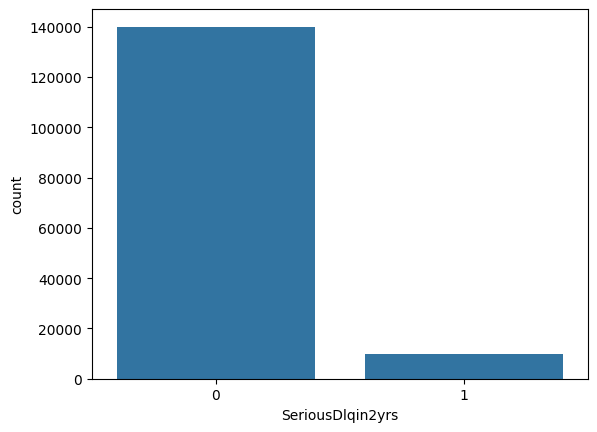

In [ ]:
sns.countplot(x  = "SeriousDlqin2yrs" , data = data)

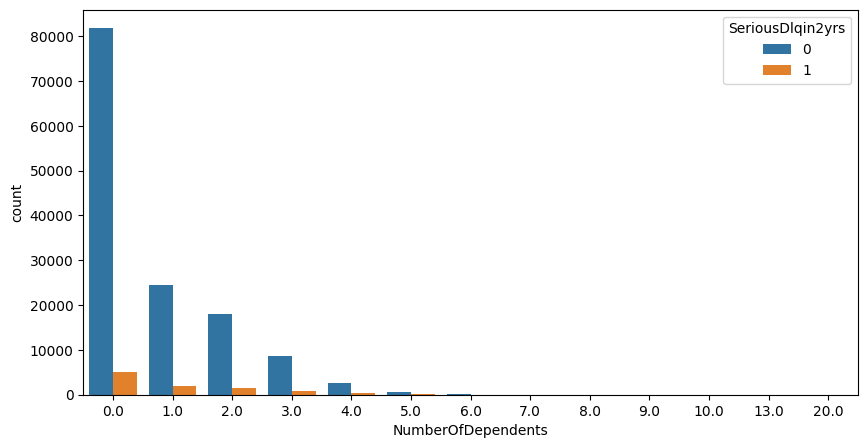

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumberOfDependents', hue = "SeriousDlqin2yrs" , data = data)
plt.show()

In [ ]:
pd.crosstab(data['NumberOfDependents'], data['SeriousDlqin2yrs'])

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,81807,5095
1.0,24381,1935
2.0,17938,1584
3.0,8646,837
4.0,2565,297
5.0,678,68
6.0,134,24
7.0,46,5
8.0,22,2


In [ ]:
pd.crosstab(data['NumberOfDependents'], data['SeriousDlqin2yrs'], normalize='index')*100

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,94.137074,5.862926
1.0,92.647059,7.352941
2.0,91.886077,8.113923
3.0,91.173679,8.826321
4.0,89.622642,10.377358
5.0,90.884718,9.115282
6.0,84.810127,15.189873
7.0,90.196078,9.803922
8.0,91.666667,8.333333


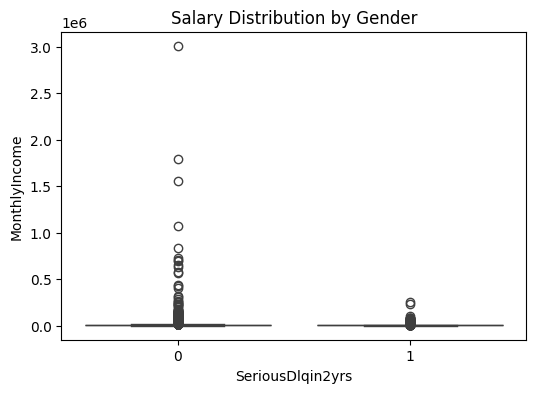

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='SeriousDlqin2yrs', y='MonthlyIncome')
plt.title('Salary Distribution by Gender')
plt.show()

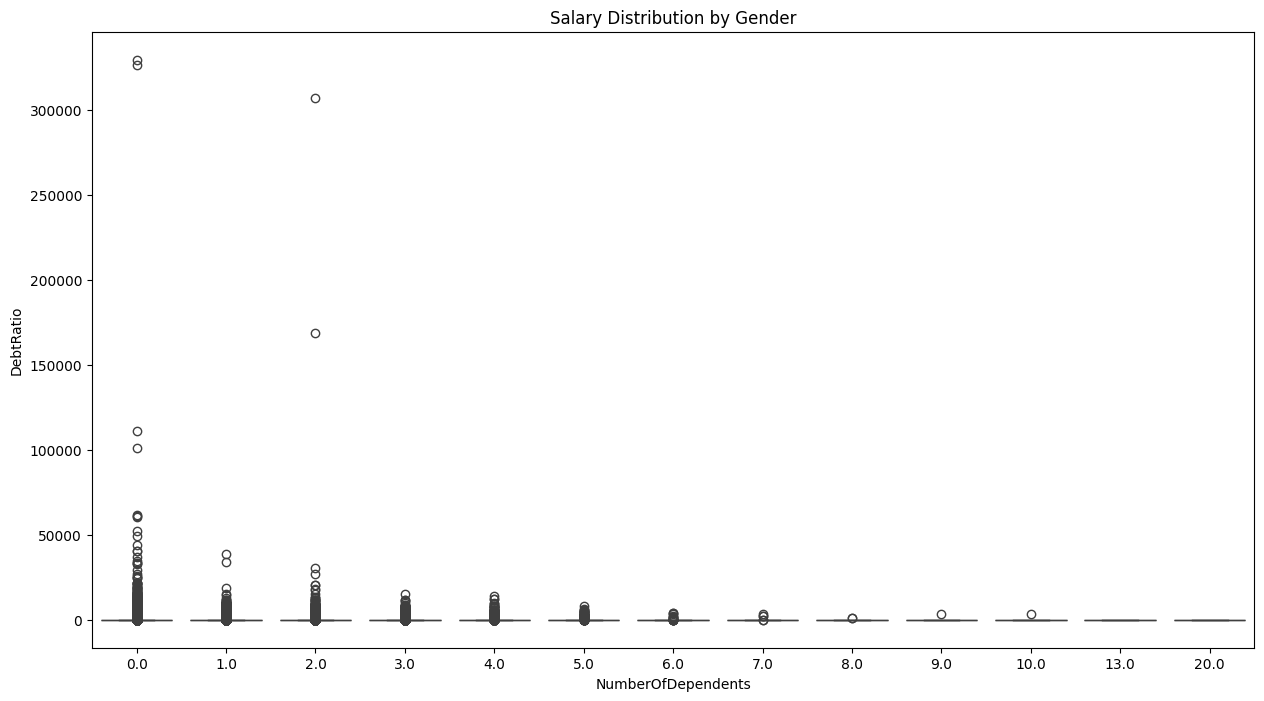

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='NumberOfDependents', y='DebtRatio')
plt.title('Salary Distribution by Gender')
plt.show()

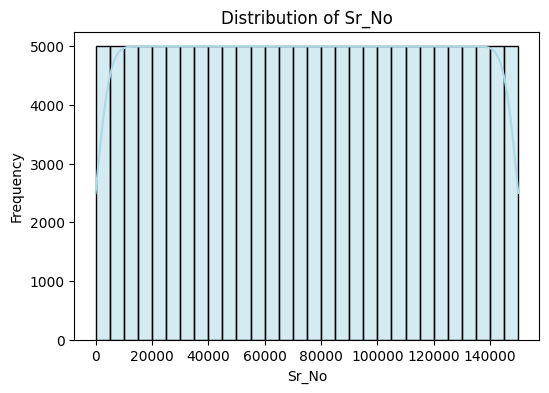

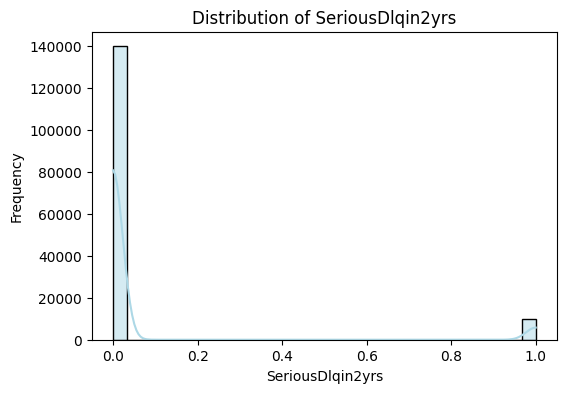

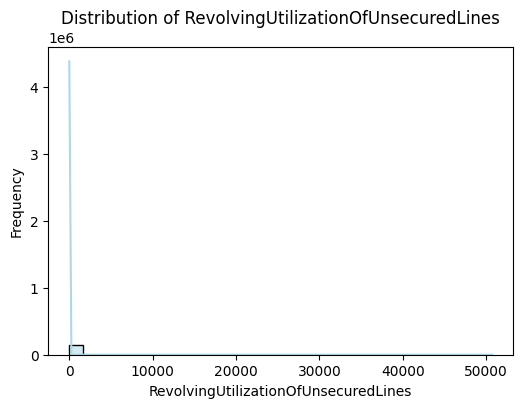

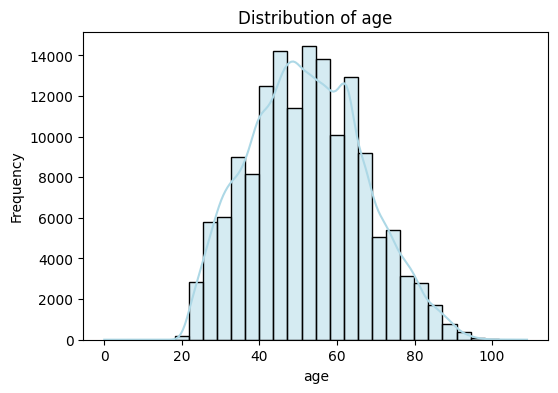

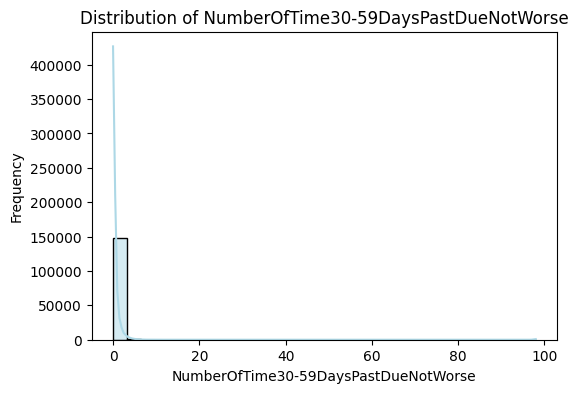

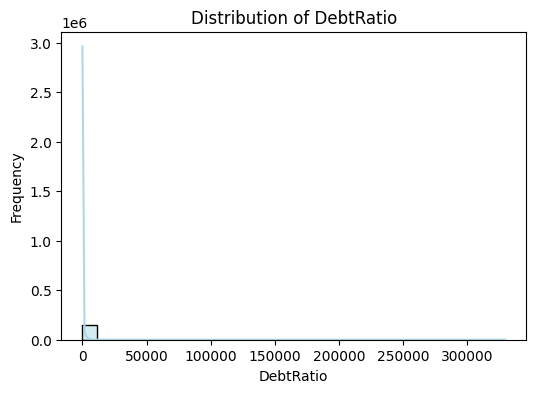

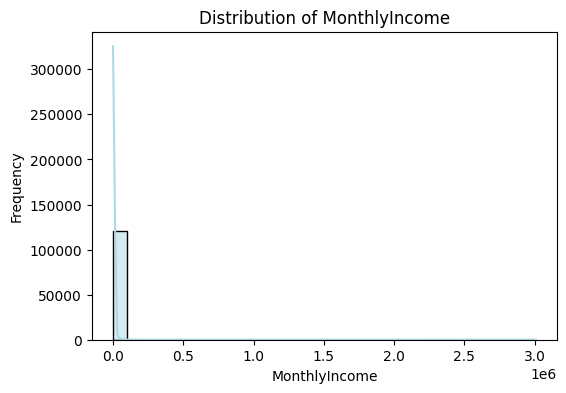

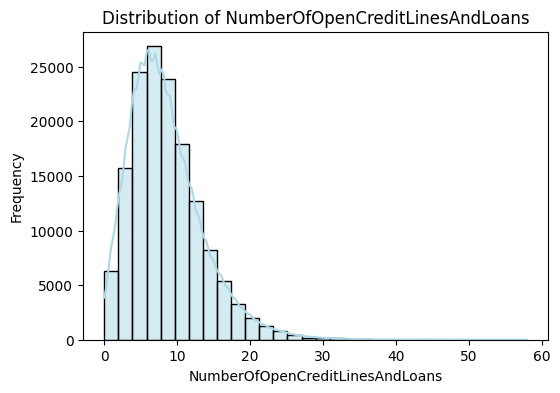

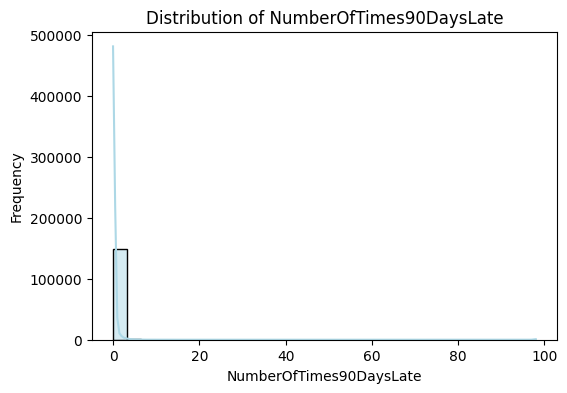

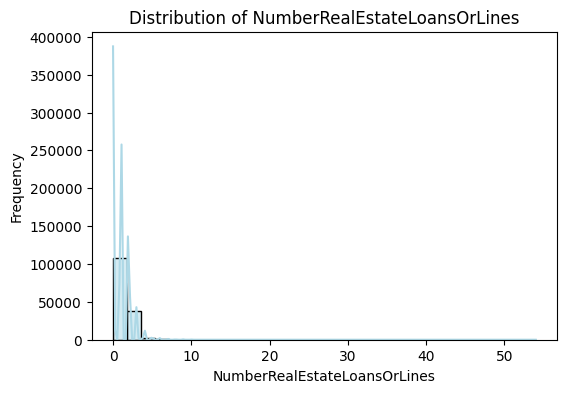

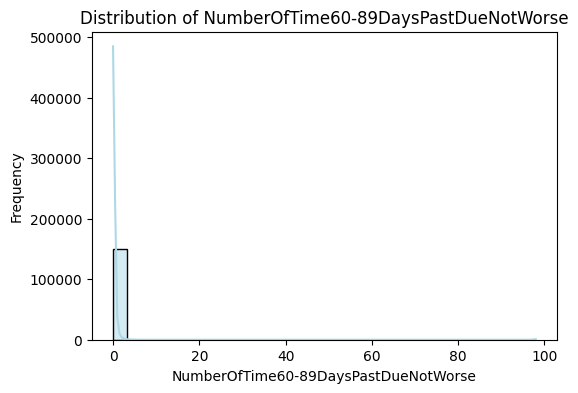

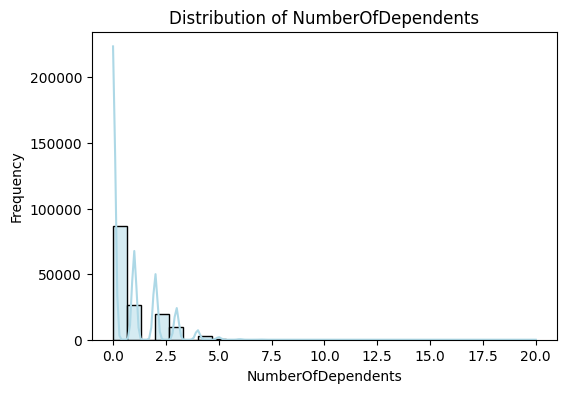

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# df=data.copy()
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True, color='lightblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


## continuous variable exploration

Different cases of missing values.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ujwaldeepk/Datasets/refs/heads/main/Lab/Lec02-Data_Cleaning/all_missing_values.csv')

In [ ]:
df.describe()

,A,B,C,D,E
count,50.000000,50.00000,23.000000,32.000000,47.000000
mean,50.200000,51.18000,35.695652,50.531250,48.191489
std,27.653837,30.47695,29.970341,32.716755,30.142155
min,2.000000,2.00000,1.000000,3.000000,3.000000
25%,22.500000,24.50000,9.000000,24.250000,23.000000
50%,54.000000,53.50000,35.000000,57.000000,40.000000
75%,72.750000,79.50000,45.000000,78.750000,70.000000
max,93.000000,95.00000,89.000000,97.000000,96.000000


In [ ]:
df.isnull().sum()/len(df)

,0
A,0.00
B,0.00
C,0.54
D,0.36
E,0.06


>50 missing

In [ ]:
df['C_missing_flag'] = 1
df.loc[df['C'].isnull(), 'C_missing_flag'] = 0

10-50 missing

In [ ]:
df['D_missing_flag'] = 1
df.loc[df['D'].isnull(), 'D_missing_flag'] = 0 #df['D'].median()

In [ ]:
df['D_new'] = df['D']#.copy()
df.loc[df['D'].isnull(), 'D_new'] = df['D'].median()

<10 missing

In [ ]:
df['E_new'] = df['E']#.copy()
df.loc[df['E'].isnull(), 'E_new'] = df['E'].median()

In [ ]:
df.head(10)

,A,B,C,D,E,C_missing_flag,D_missing_flag,D_new,E_new
0,52,4,NaN,NaN,20.0,0,0,57.0,20.0
1,93,89,8.0,28.0,32.0,1,1,28.0,32.0
2,15,60,9.0,NaN,90.0,1,0,57.0,90.0
3,72,14,1.0,84.0,NaN,1,1,84.0,40.0
4,61,9,NaN,6.0,96.0,0,1,6.0,96.0
5,21,90,NaN,89.0,40.0,0,1,89.0,40.0
6,83,53,NaN,97.0,23.0,0,1,97.0,23.0
7,87,2,NaN,71.0,40.0,0,1,71.0,40.0
8,75,84,NaN,NaN,3.0,0,0,57.0,3.0
9,75,92,15.0,57.0,9.0,1,1,57.0,9.0


dropping original columns is optional... you can keep them, but dont use them

In [ ]:
# Drop the original columns with missing values
#df.drop(columns=['C'], inplace=True)